In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()

## Preprocessing

In [3]:
# load data
wages = pd.read_csv('data/wages.csv')
wages.drop('company', 1, inplace=True)

# split data
x, y = wages['experience'], wages['salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# for plotting purposes
x_grid = np.arange(-1,16, 0.1)

# reshape 1d-array to 2d-array
x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_test, 1)
x_grid = np.expand_dims(x_grid, 1)

## Polynomial Regression

In [4]:
def poly_regression(deg, display=True):
    
    def rmse(y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred)**2))

    # feature expansion
    poly = PolynomialFeatures(degree=deg)
    poly_train = poly.fit_transform(x_train)
    poly_test = poly.transform(x_test)
    poly_grid = poly.transform(x_grid)
    
    # fit a model   
    lr = LinearRegression()
    lr.fit(poly_train, y_train)
        
    # make predictions 
    preds_train = lr.predict(poly_train)  
    preds_test = lr.predict(poly_test)  
    
    # evaluate error
    error_train = rmse(y_train, preds_train)
    error_test = rmse(y_test, preds_test)
    
    # display results
    if display:
        preds = lr.predict(poly_grid)
        plt.figure(figsize=(10, 4))
        plt.title(f'degree: {deg}\n'\
                  f'training error: {error_train:0.3f},\n'\
                  f'validation error: {error_test:0.3f}')
        plt.scatter(x_train, y_train)
        plt.scatter(x_test, y_test)
        plt.plot(x_grid, preds)
        plt.ylim(0, 150000)
        plt.xlim(0, 13)
        plt.grid()
        plt.show()
    
    return error_train, error_test

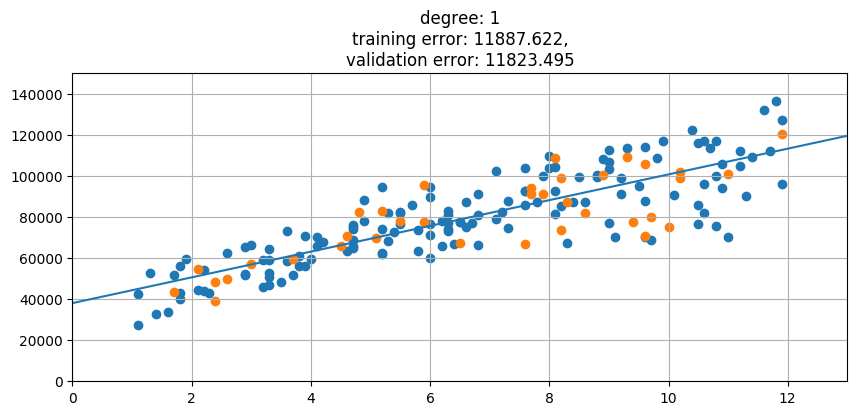

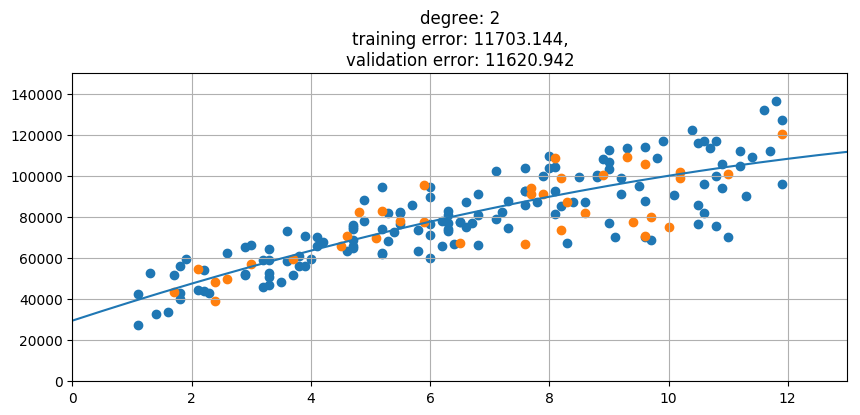

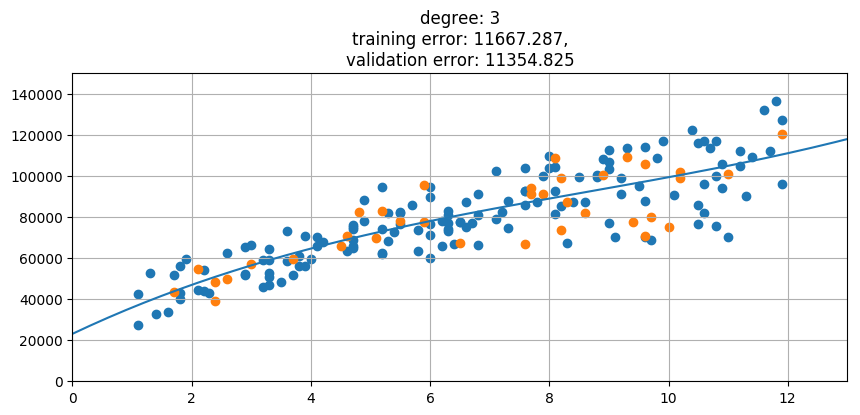

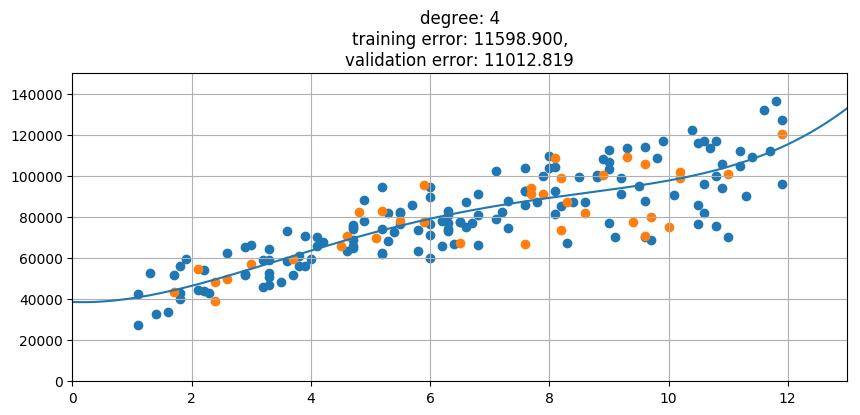

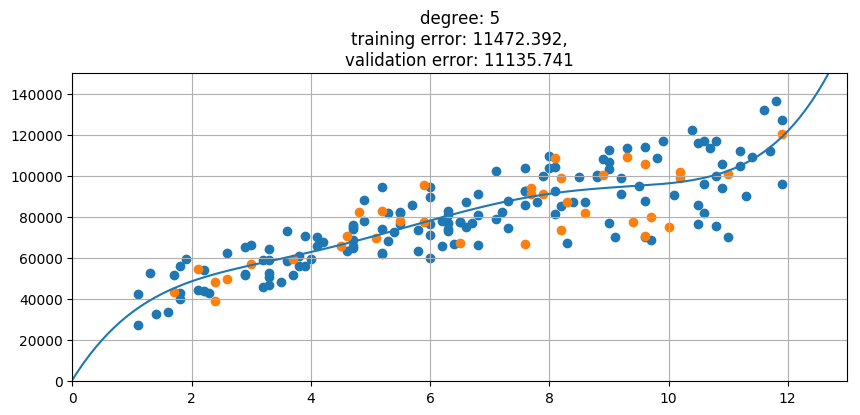

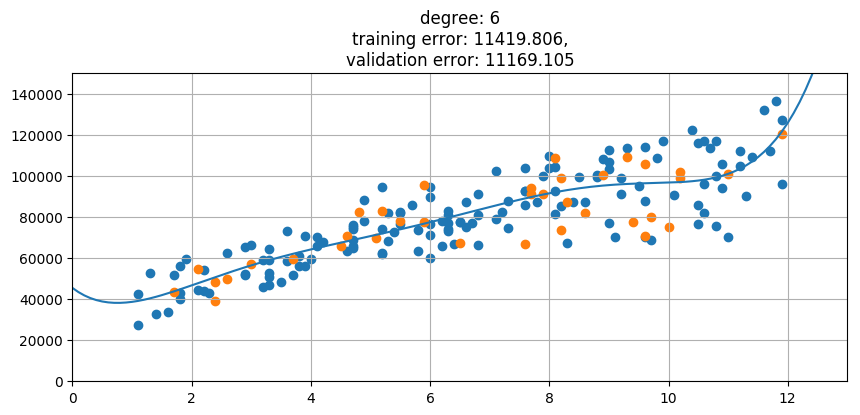

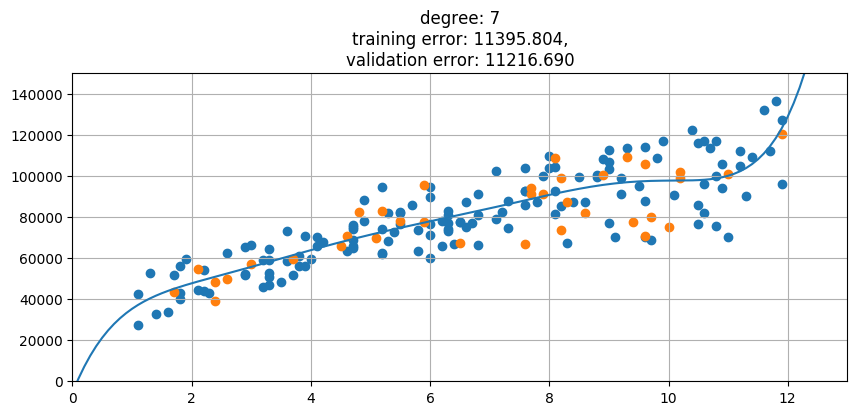

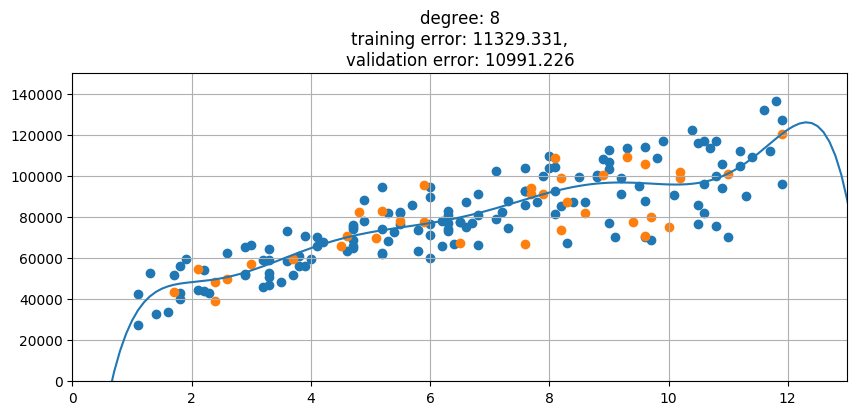

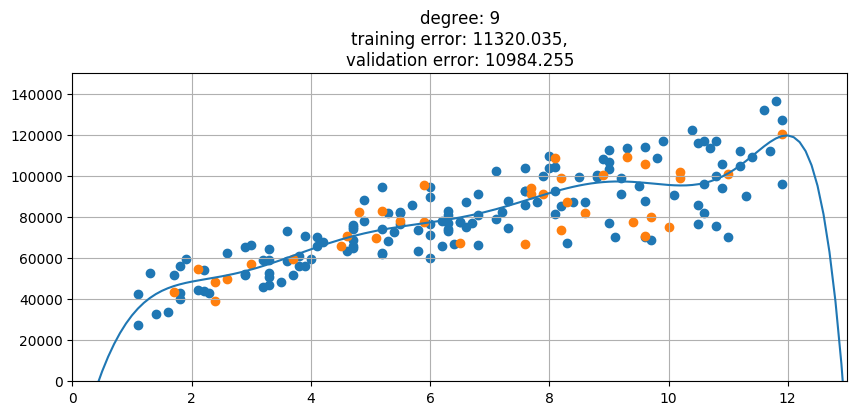

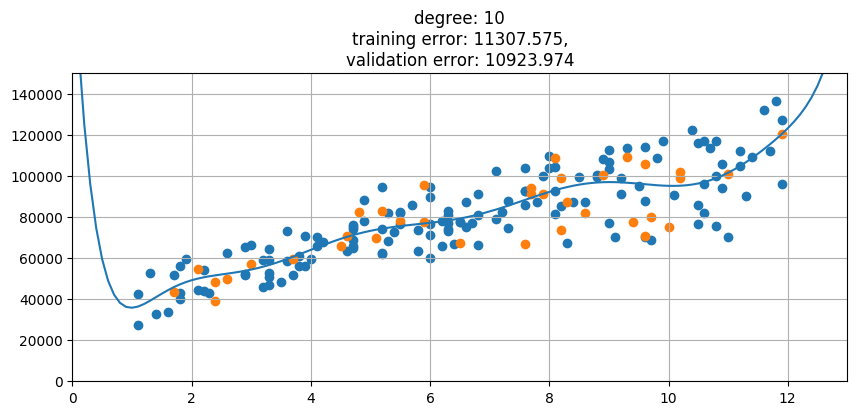

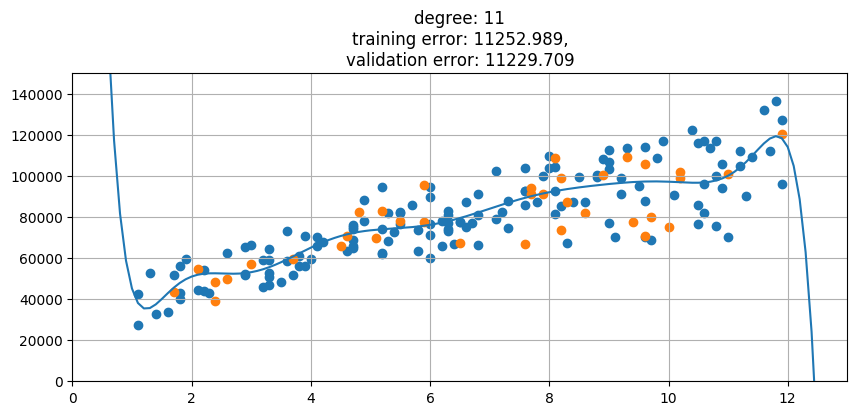

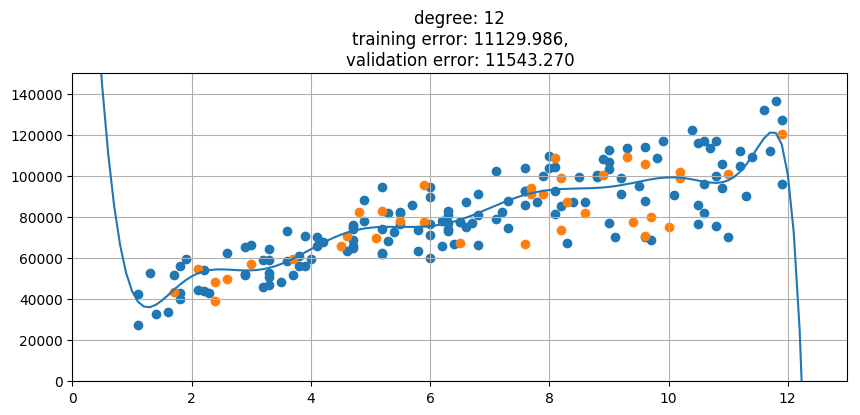

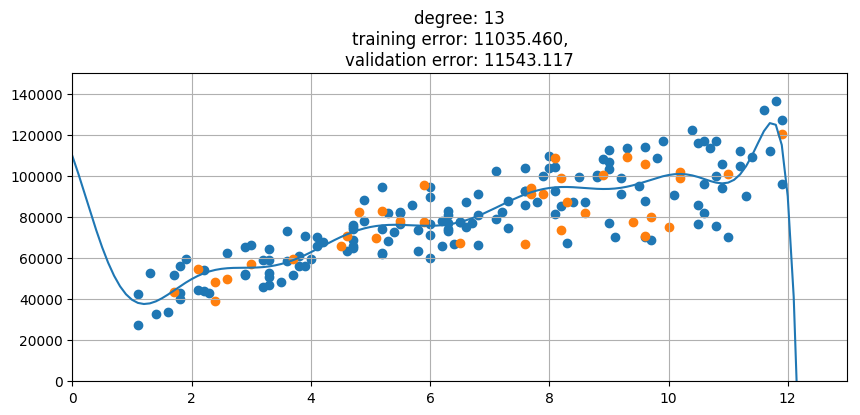

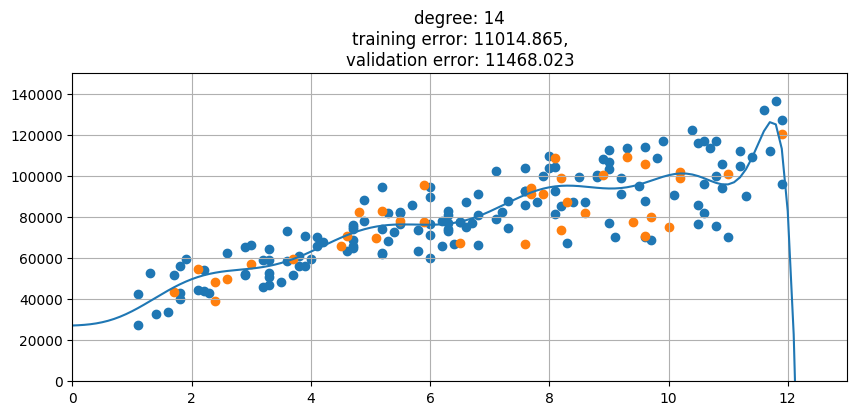

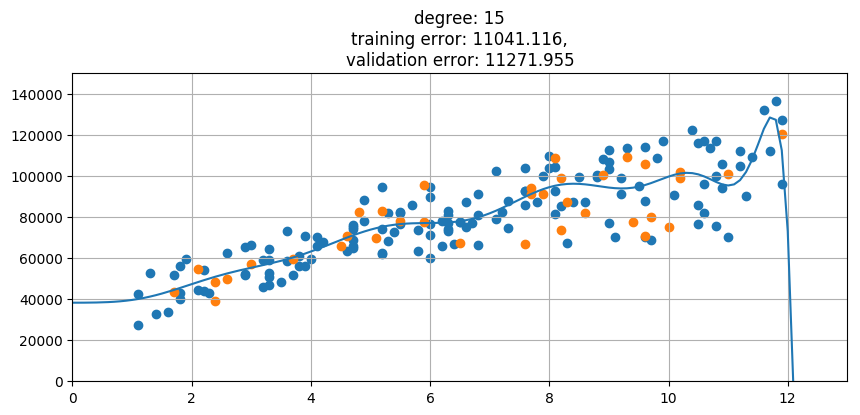

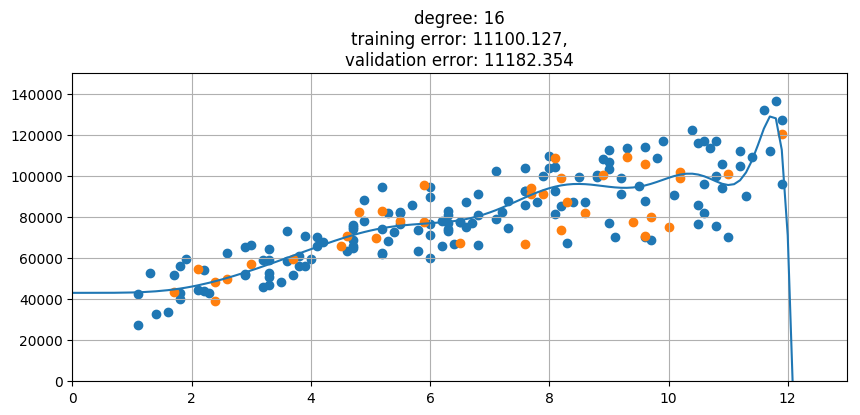

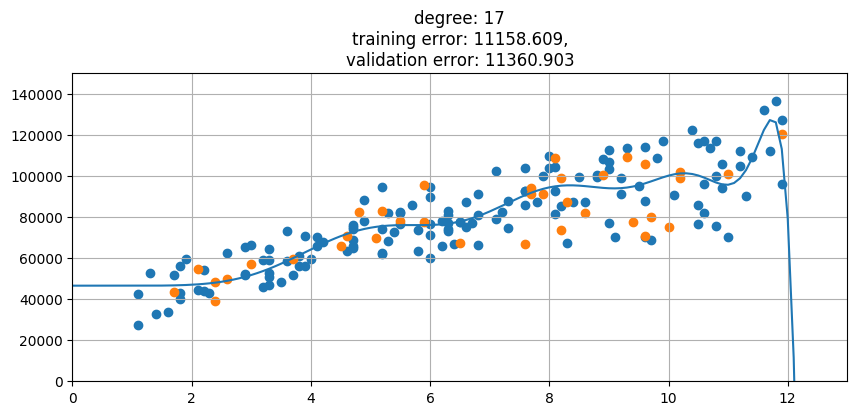

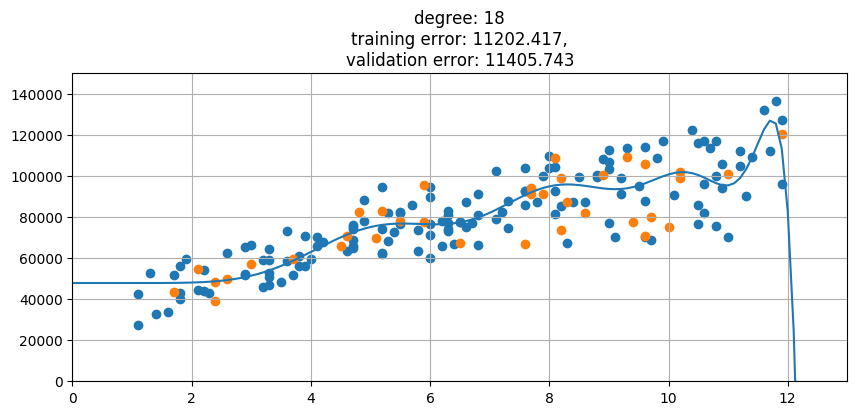

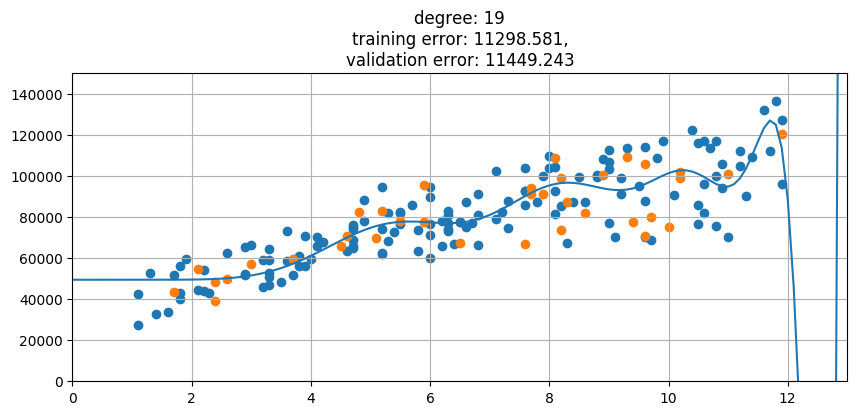

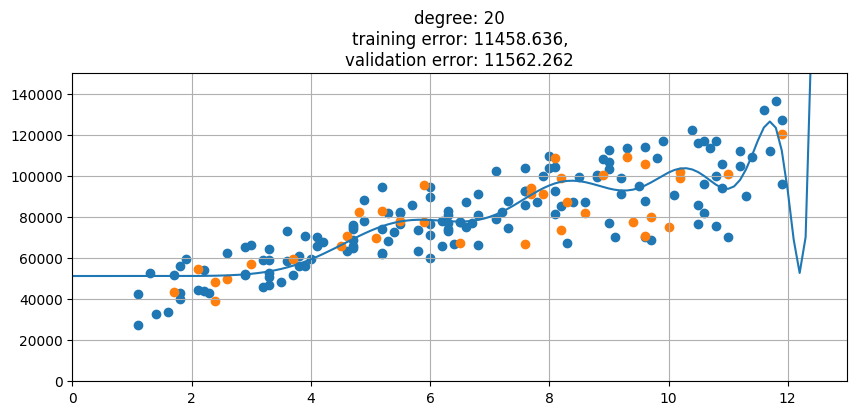

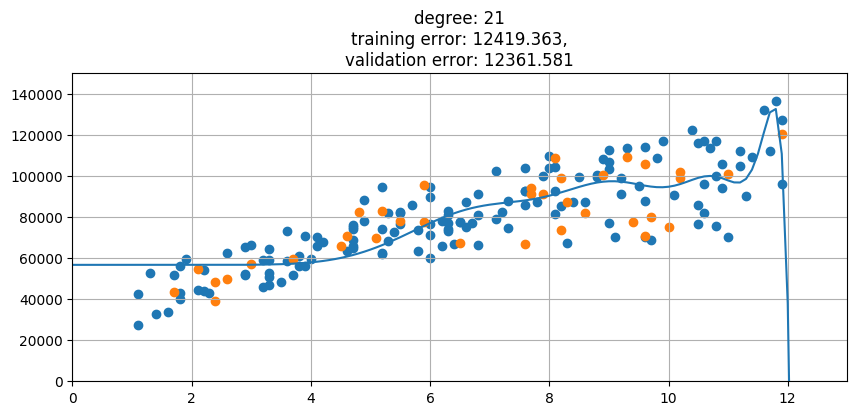

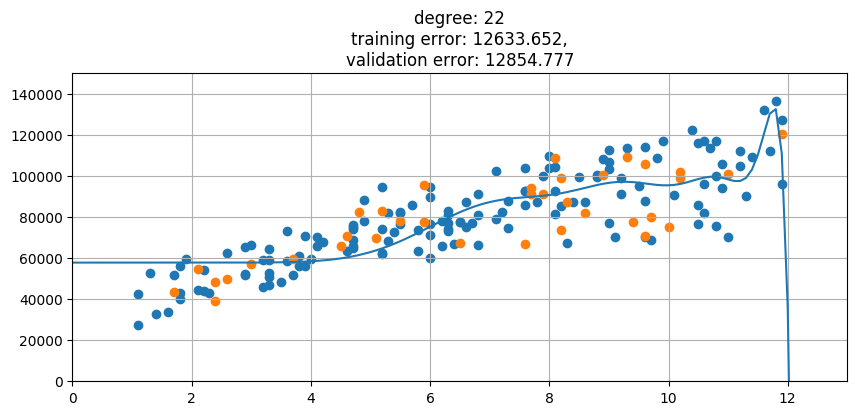

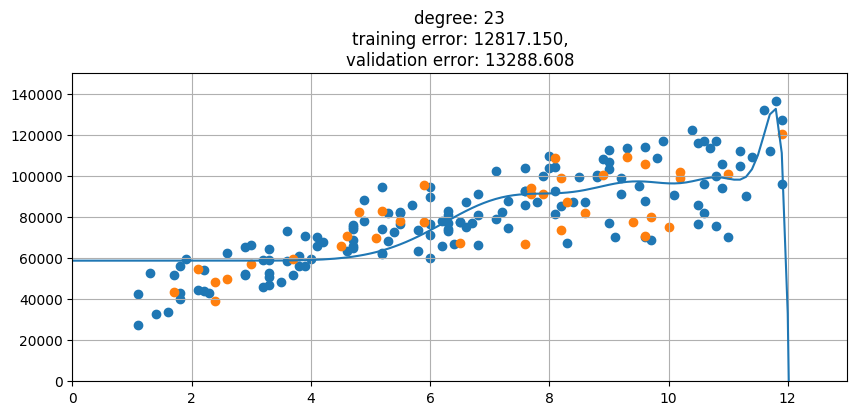

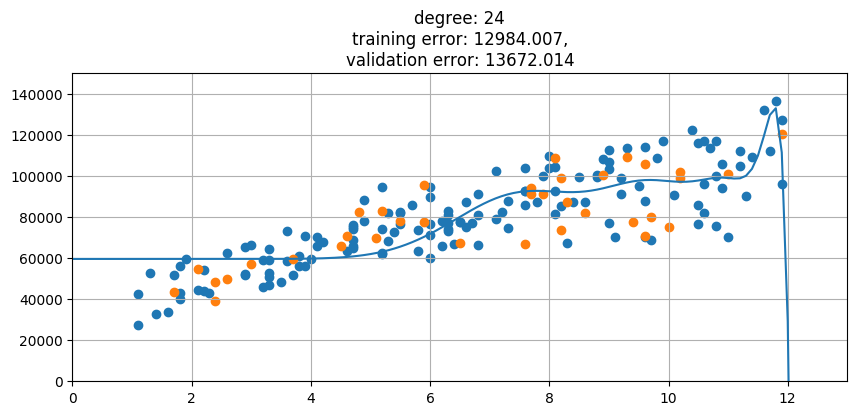

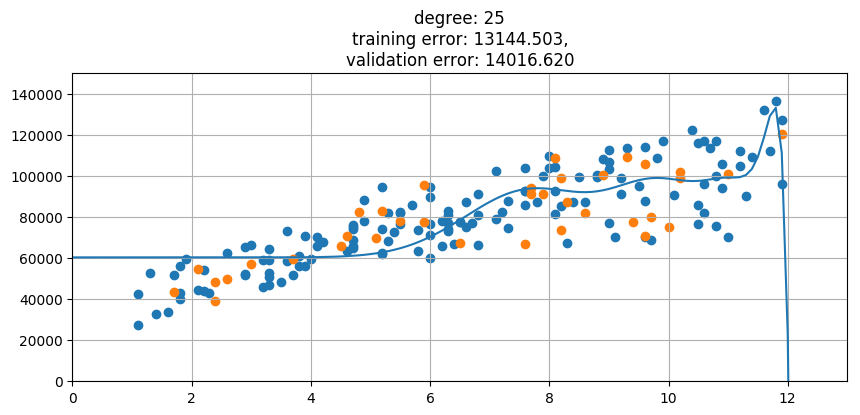

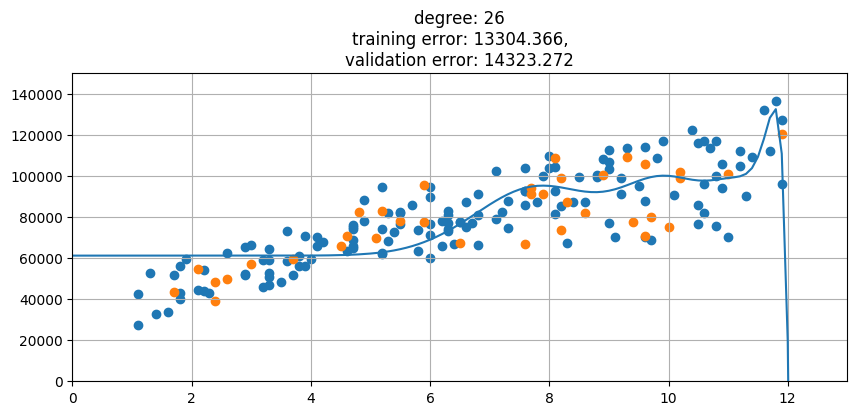

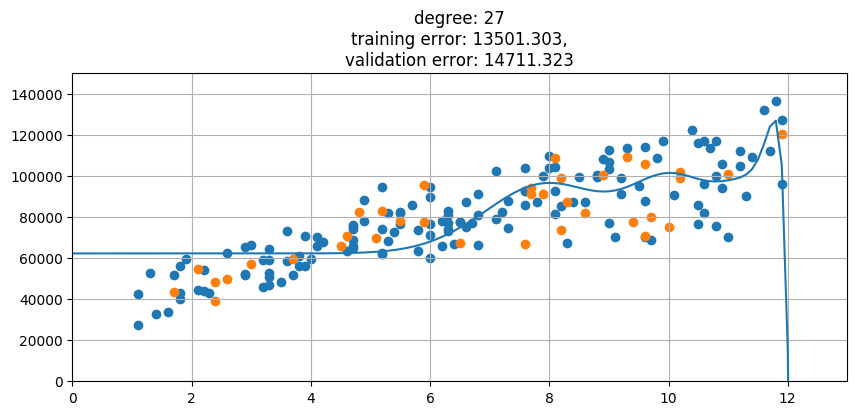

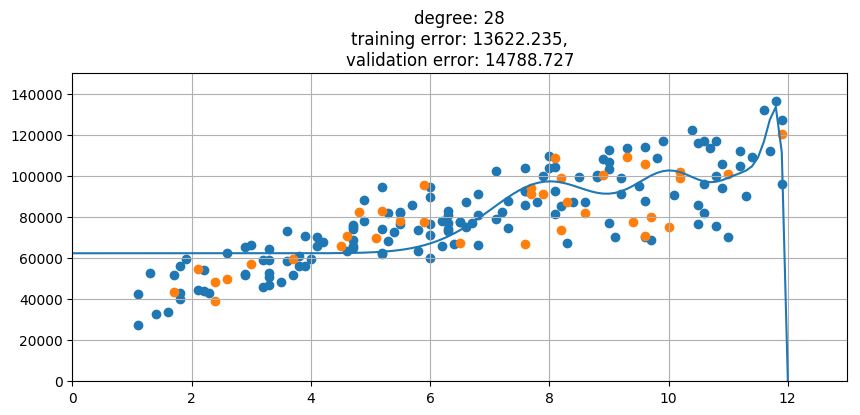

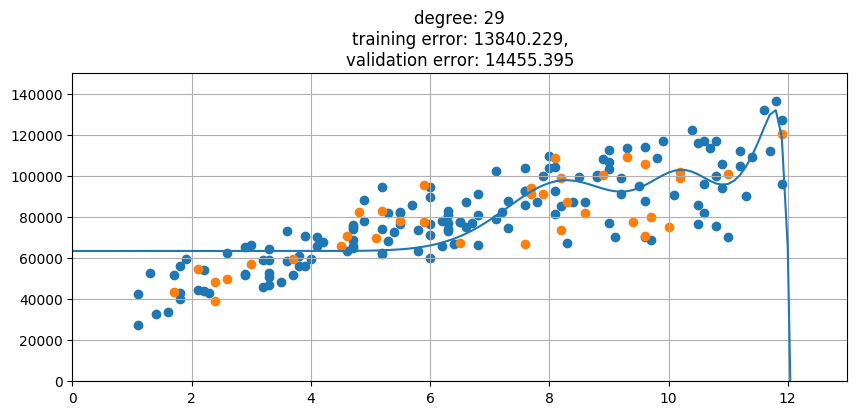

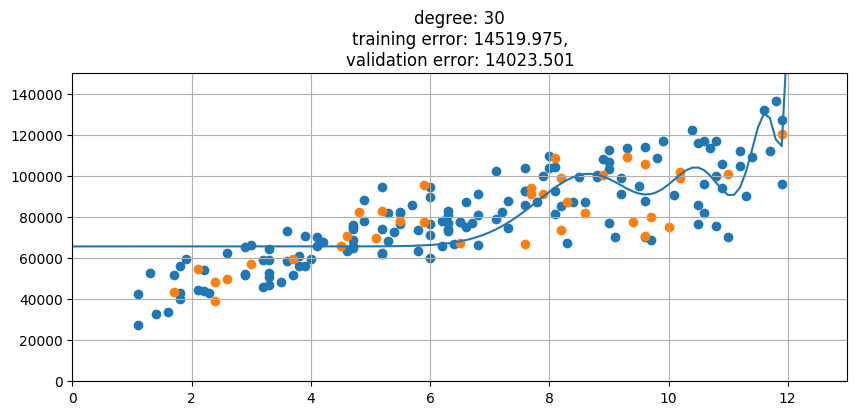

In [5]:
for d in range(1, 31):
    poly_regression(d)